In [1]:
import json
import numpy as np
from Necessary_functions import *

# used to convert vibrational frequencies from atomic units to cm^-1
au_to_wn = 219474.602894

# read the qed-ci, pqed, and pqed with minimal basis data for lz > 0 
file_name = "H2_data_qedfci_pqed_pqed_minimal.json"
# Load the molecule data from the JSON file
with open(file_name, 'r') as json_file:
    molecule_data = json.load(json_file)



# Extract values from the loaded JSON data into Python variables
molecule_name = molecule_data["molecule_data"]["molecule_name"]
mA_au = molecule_data["molecule_data"]["mA_au"]
mB_au = molecule_data["molecule_data"]["mB_au"]
mu_au = molecule_data["molecule_data"]["mu_au"]
bondlength_scan_vals = np.array(molecule_data["molecule_data"]["bondlength_scan_vals"])
omega = molecule_data["molecule_data"]["omega"]
CI_Level = molecule_data["molecule_data"]["CI_Level"]
n_photon_basis_states = molecule_data["molecule_data"]["n_photon_basis_states"]
basis_set = molecule_data["molecule_data"]["basis_set"]
ci_info = molecule_data["molecule_data"]["ci_info"]
pqed_info = molecule_data["molecule_data"]["pqed_info"]
pqed_minimal_info = molecule_data["molecule_data"]["pqed_minimal_info"]
lambda_values = np.array(molecule_data["lambda_values"])

qed_ci = np.array(molecule_data["qed-ci"])
pqed_minimal = np.array(molecule_data["pqed_minimal"])
pqed = np.array(molecule_data["pqed_data"])

ci_lp_index = ci_info["lower_polariton_index"]
ci_up_index = ci_info["upper_polariton_index"]

pqed_lp_index = pqed_info["lower_polariton_index"]
pqed_up_index = pqed_info["upper_polariton_index"]

pqed_minimal_lp_index = pqed_minimal_info["lower_polariton_index"]
pqed_minimal_up_index = pqed_minimal_info["upper_polariton_index"]


# Print the extracted variables
print("Molecule Name:", molecule_name)
print("Mass A (au):", mA_au)
print("Mass B (au):", mB_au)
print("Reduced Mass (mu_au):", mu_au)
print("Bond Length Scan Values:", bondlength_scan_vals)
print("Omega:", omega)
print("CI Level:", CI_Level)
print("Number of Photon Basis States:", n_photon_basis_states)
print("Basis Set:", basis_set)
print("CI Info:", ci_info)
print("PQED Info:", pqed_info)
print("PQED Minimal Info:", pqed_minimal_info)
print("Lambda Values:", lambda_values)
print("QED-CASCI:", qed_ci)
print("PQED Minimal:", pqed_minimal)



Molecule Name: H2
Mass A (au): 1837.1527318119486
Mass B (au): 1837.1527318119486
Reduced Mass (mu_au): 918.5763659059743
Bond Length Scan Values: [0.25       0.26767677 0.28535354 0.3030303  0.32070707 0.33838384
 0.35606061 0.37373737 0.39141414 0.40909091 0.42676768 0.44444444
 0.46212121 0.47979798 0.49747475 0.51515152 0.53282828 0.55050505
 0.56818182 0.58585859 0.60353535 0.62121212 0.63888889 0.65656566
 0.67424242 0.69191919 0.70959596 0.72727273 0.74494949 0.76262626
 0.78030303 0.7979798  0.81565657 0.83333333 0.8510101  0.86868687
 0.88636364 0.9040404  0.92171717 0.93939394 0.95707071 0.97474747
 0.99242424 1.01010101 1.02777778 1.04545455 1.06313131 1.08080808
 1.09848485 1.11616162 1.13383838 1.15151515 1.16919192 1.18686869
 1.20454545 1.22222222 1.23989899 1.25757576 1.27525253 1.29292929
 1.31060606 1.32828283 1.3459596  1.36363636 1.38131313 1.3989899
 1.41666667 1.43434343 1.4520202  1.46969697 1.48737374 1.50505051
 1.52272727 1.54040404 1.55808081 1.57575758 1.593

H2
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


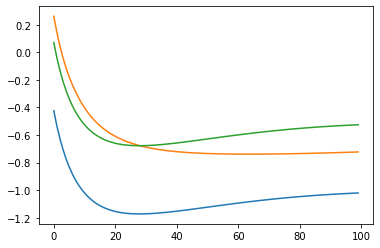

In [2]:
# read the qed-ci, pqed, and pqed with minimal basis data for lz = 0 
with open("Uncoupled_molecules_data.json", 'r') as json_file:
    molecule_data_uncoupled_1_photon = json.load(json_file)
molecule_name = file_name.split('_')[0]
print(molecule_name)
molecule_data_uncoupled_1_photon = np.array(molecule_data_uncoupled_1_photon[molecule_name]["Uncoupled_Surfaces"])
plt.plot(molecule_data_uncoupled_1_photon)

#fit in the data into pqed minimal, pqed , qed-ci, 

no_coupling_pqed = np.zeros_like(pqed[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed= pqed.tolist()
pqed.insert(0, no_coupling_pqed.tolist())  
pqed = np.array(pqed)



# not very clear which one should be lp and which should be up
no_coupling_pqed = np.zeros_like(pqed_minimal[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_minimal_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_minimal_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed_minimal= pqed_minimal.tolist()
pqed_minimal.insert(0, no_coupling_pqed.tolist())  
pqed_minimal = np.array(pqed_minimal)


no_coupling_qed_ci= np.zeros_like(qed_ci[0])
no_coupling_qed_ci[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_qed_ci[:, ci_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_qed_ci[:, ci_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

qed_ci= qed_ci.tolist()
qed_ci.insert(0, no_coupling_qed_ci.tolist())  
qed_ci= np.array(qed_ci)

lambda_values = lambda_values.tolist()
lambda_values.insert(0, 0.0)
lambda_values = np.array(lambda_values)
print(lambda_values)


# Read QED-TDDFT Data

In [3]:
# read the QED-TDDFT data here, this is lz = 0 and lz > 0 all in one file
h2_tddft_pes = np.loadtxt("H2/H2_PBE.txt")

# tddft S0 and S1
tddft_S0 = h2_tddft_pes[:,1]
tddft_S1 = h2_tddft_pes[:,2]

# qed-tddft lz = 0.01 data
tddft_lp_lz_p01 = h2_tddft_pes[:,4]
tddft_up_lz_p01 = h2_tddft_pes[:,5]

# qed-tddft lz = 0.05 data
tddft_lp_lz_p05 = h2_tddft_pes[:,12]
tddft_up_lz_p05 = h2_tddft_pes[:,13]

# qed-tddft lz = 0.1 data
tddft_lp_lz_p1 = h2_tddft_pes[:,14]
tddft_up_lz_p1 = h2_tddft_pes[:,15]

In [4]:
# build dictionry for storing data 

# Define your method names
methods = ["QED-FCI(10ph)", "pPF(5el,4ph)", "pPF(100el,10ph)", "QED-TDDFT(2ph)", "QED-CCSD(2ph)"]

# Define your coupling scenarios
coupling_cases = {
    "No Coupling": {"lambda_vector": [0.0, 0.0, 0.0], "omega": 0.0},
    "Weak Coupling": {"lambda_vector": None, "omega": None},   # Fill in actual values
    "Medium Coupling": {"lambda_vector": None, "omega": None},
    "Strong Coupling": {"lambda_vector": None, "omega": None},
}

# Define which states exist in each coupling case
states_by_case = {
    "No Coupling": ["S0", "S1"],
    "Weak Coupling": ["S0", "LP", "UP"],
    "Medium Coupling": ["S0", "LP", "UP"],
    "Strong Coupling": ["S0", "LP", "UP"],
}

# Define which state pairs are relevant for FC and HR factors
spectroscopic_pairs = {
    "No Coupling": [("S0", "S1")],
    "Weak Coupling": [("S0", "LP"), ("S0", "UP")],
    "Medium Coupling": [("S0", "LP"), ("S0", "UP")],
    "Strong Coupling": [("S0", "LP"), ("S0", "UP")],
}

# Initialize the dictionary
results = {}

for method in methods:
    results[method] = {}
    
    for case_name, case_params in coupling_cases.items():
        results[method][case_name] = {
            "lambda_vector": case_params["lambda_vector"],
            "omega": case_params["omega"],
            "geometry": {state: None for state in states_by_case[case_name]},
            "frequency": {state: None for state in states_by_case[case_name]},
            "spectroscopic_factors": {
                "FC": {pair: None for pair in spectroscopic_pairs[case_name]},
                "HR": {pair: None for pair in spectroscopic_pairs[case_name]},
            }
        }


# Plots of PES

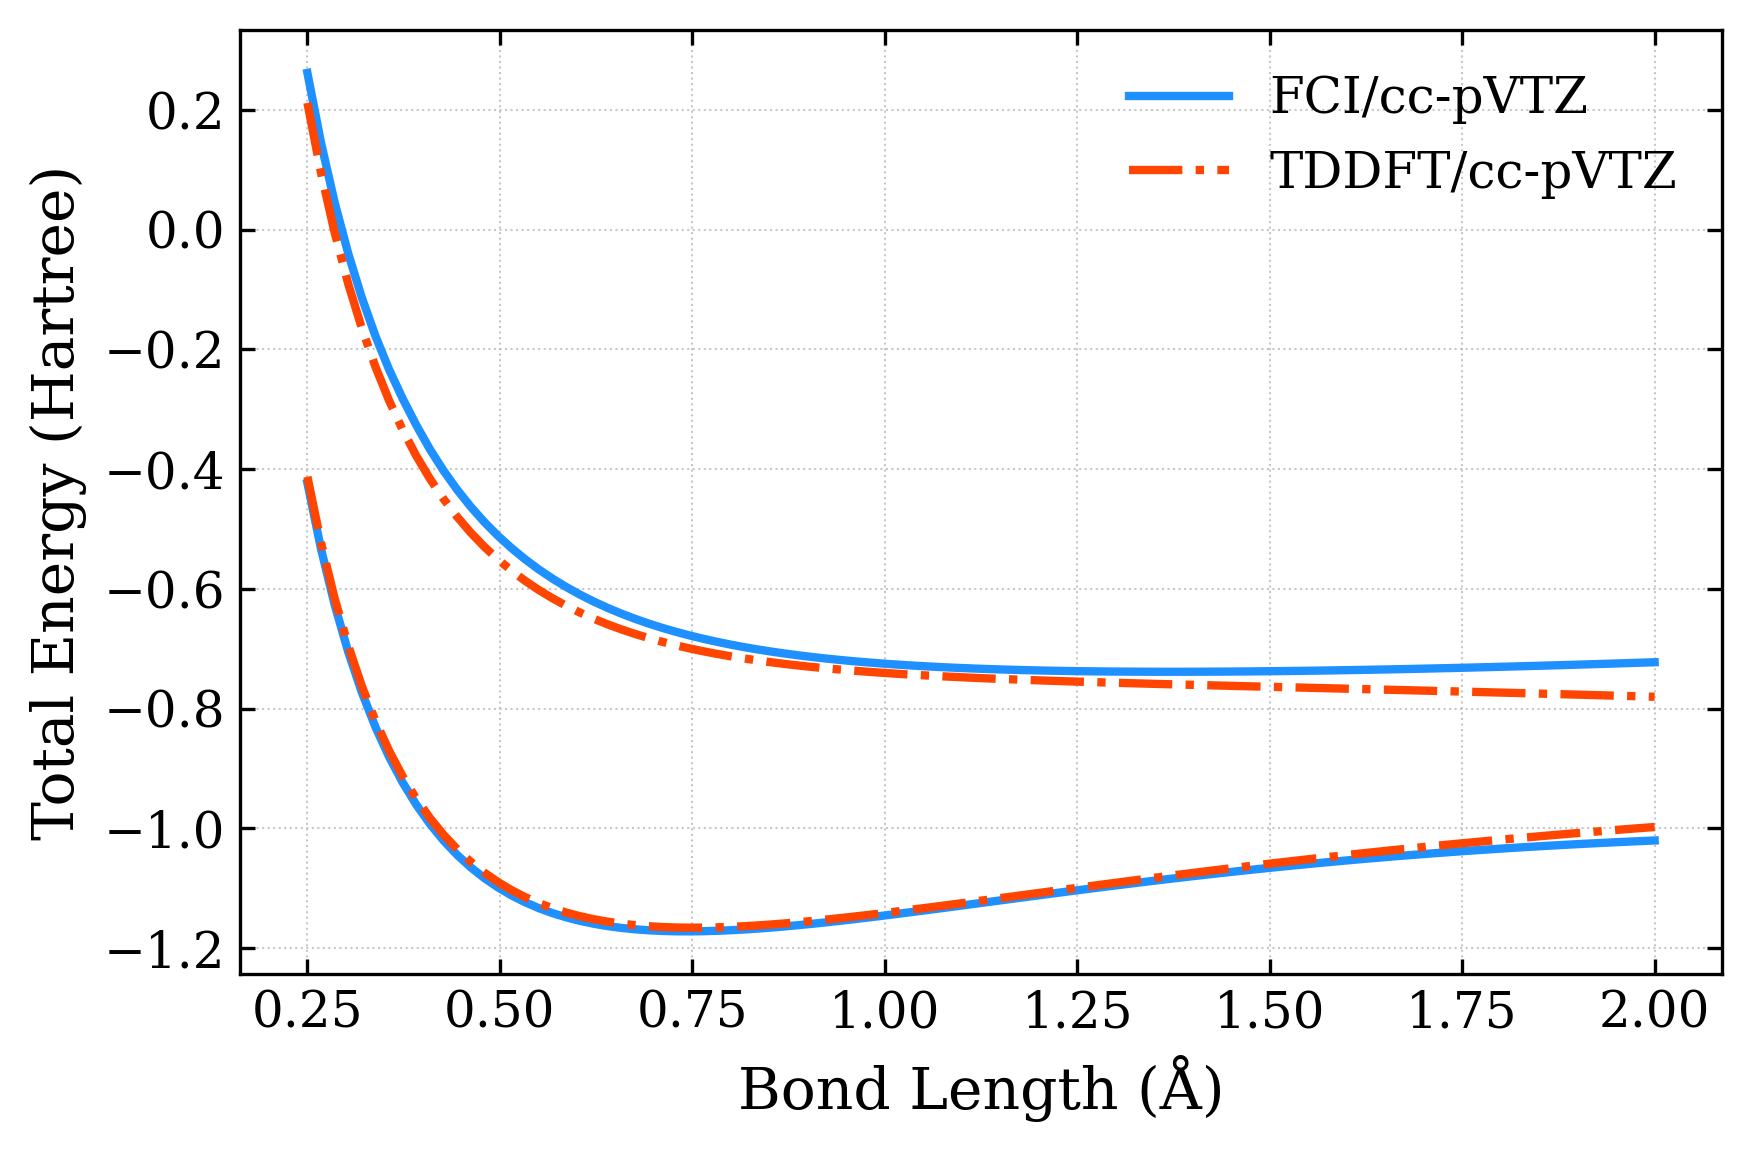

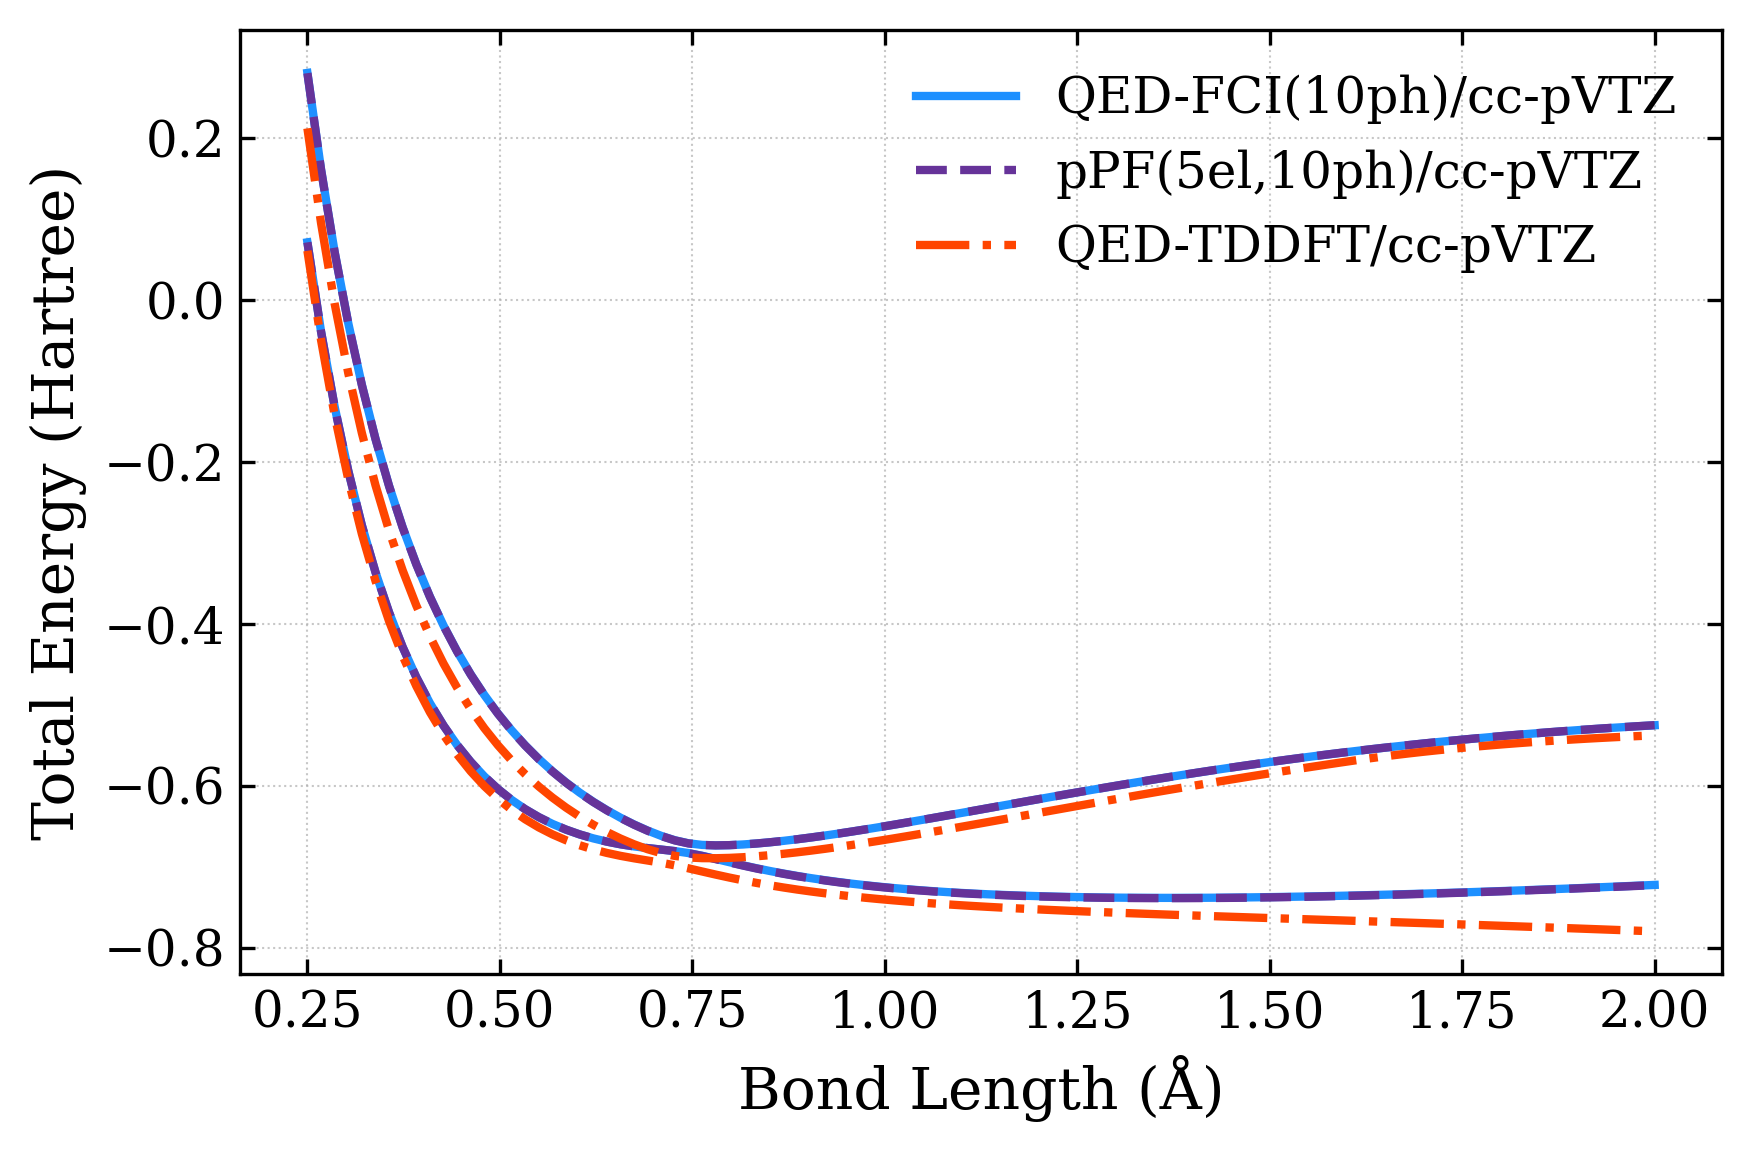

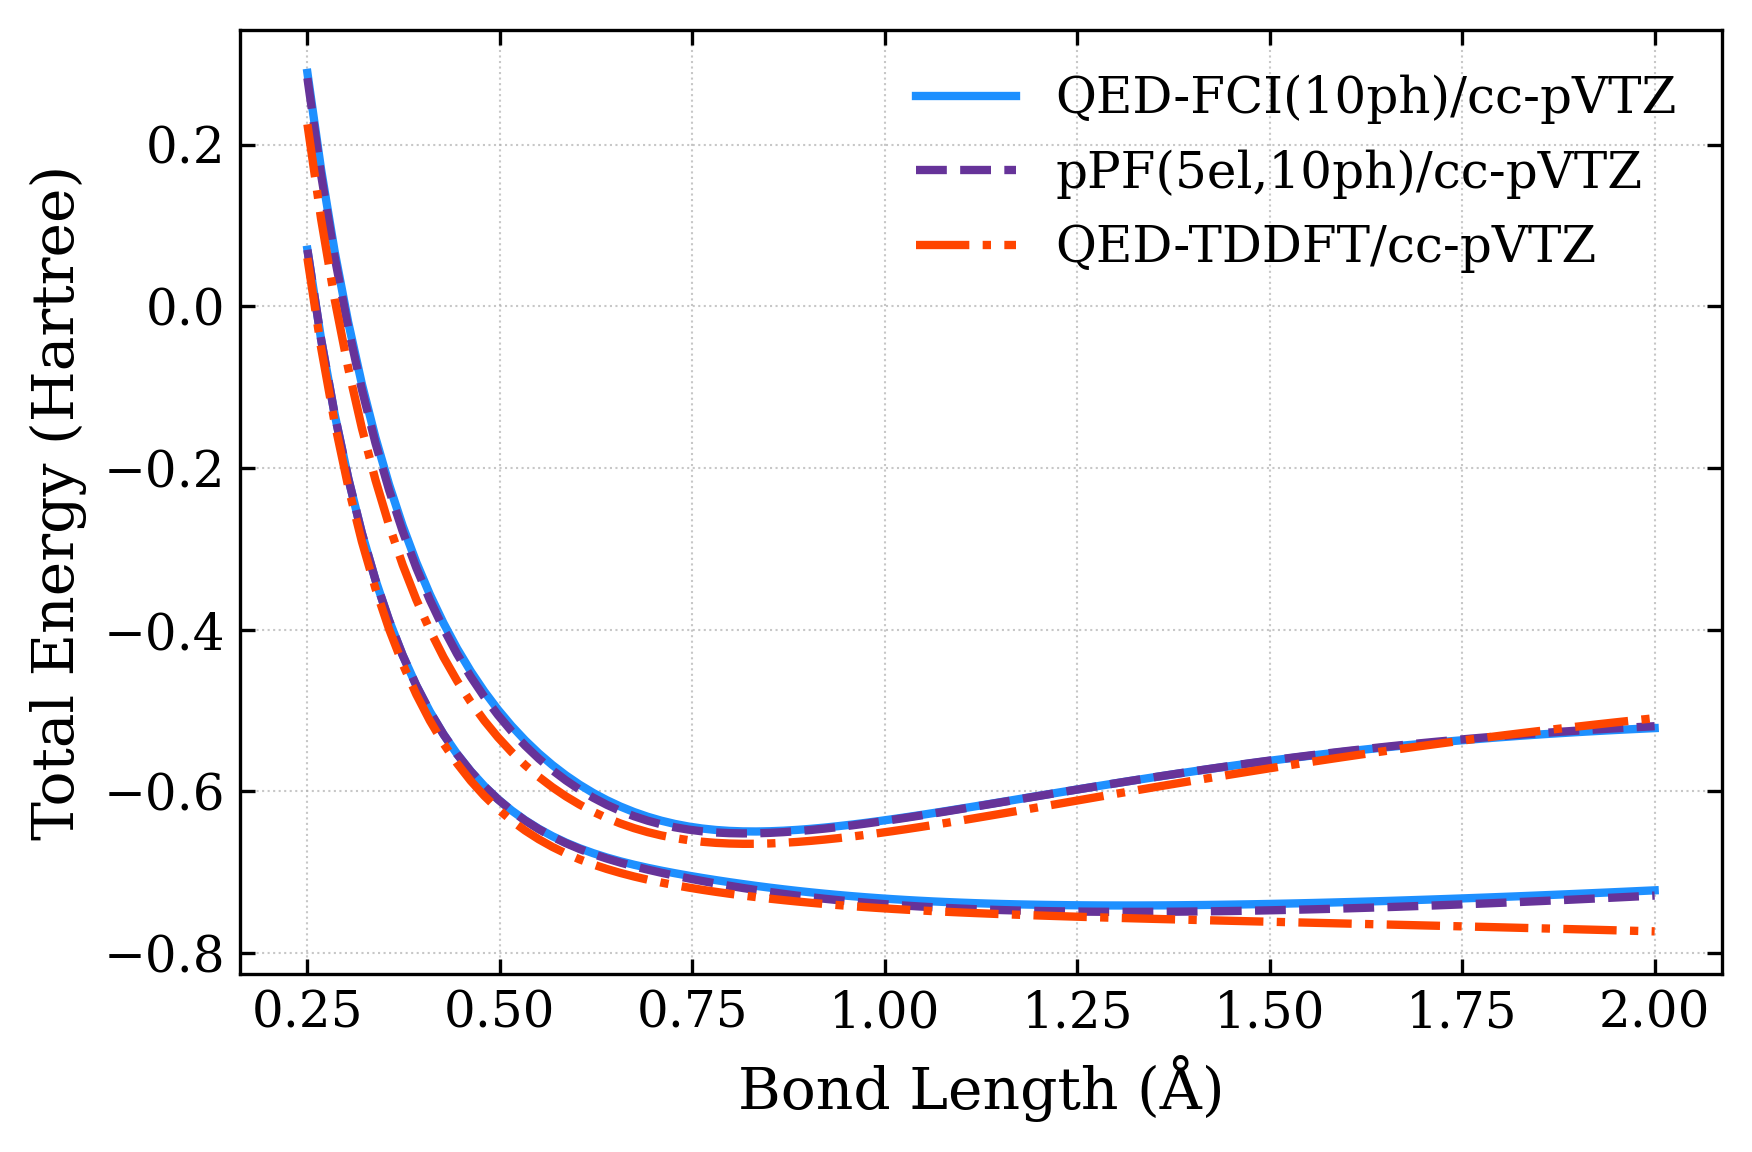

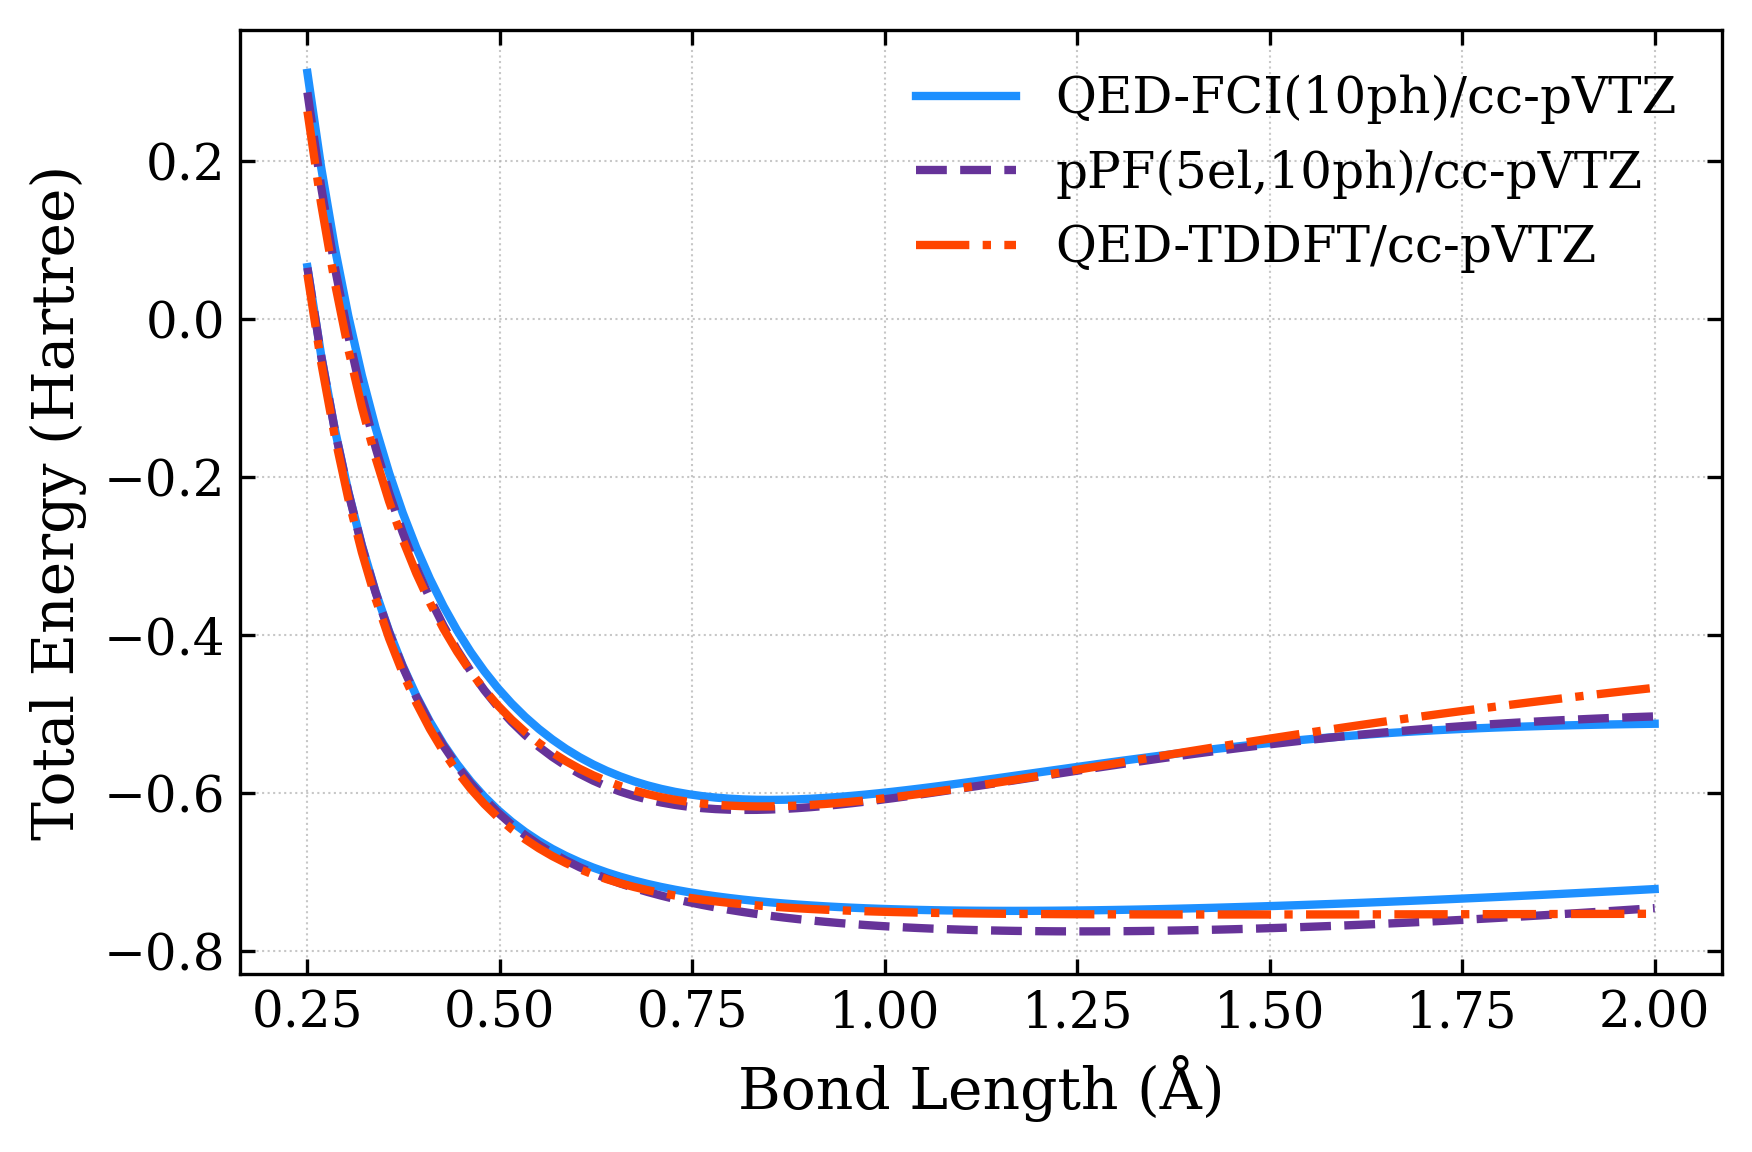

In [5]:
import matplotlib as mpl

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,  # Set to True if using LaTeX rendering
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})

color3 = "rebeccapurple"
color2 = "salmon"
color1 = "forestgreen"
color4 = "dodgerblue"
color5 = "orangered"

# Define styles
styles = {
    "QED-FCI": {"color": color4, "linestyle": "-"}, #"marker": "o", "markerfacecolor":color4},
    "PQED": {"color": color3, "linestyle": "--"}, # "marker": "s", "markerfacecolor":"none"},
    "QED-TDDFT": {"color": color5, "linestyle": "-."} #, "marker": "^", "markerfacecolor":"none"},
}



fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[0][:,  0 ],
        label=r"FCI/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[0][:,  2 ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, tddft_S0,
        label=r"TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_S1,
        **styles["QED-TDDFT"])


# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_cavity_free_states_vs_bondlength.png", format='png', dpi=600)

# Show the plot
plt.show()

## lz - 0.01

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_lp_index ],
        label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_up_index ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_lp_index ],
        label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_up_index ],
        **styles["PQED"])

ax.plot(bondlength_scan_vals, tddft_lp_lz_p01,
        label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p01,
        **styles["QED-TDDFT"])




# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_pol_lz_0p01.png", format='png', dpi=600)

# Show the plot
plt.show()


## lz - 0.05

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_lp_index ],
        label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_up_index ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_lp_index ],
        label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_up_index ],
        **styles["PQED"])

ax.plot(bondlength_scan_vals, tddft_lp_lz_p05,
        label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p05,
        **styles["QED-TDDFT"])




# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_pol_lz_0p01.png", format='png', dpi=600)

# Show the plot
plt.show()

### lz = 0.1


fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_lp_index ],
        label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_up_index ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_lp_index ],
        label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_up_index ],
        **styles["PQED"])

ax.plot(bondlength_scan_vals, tddft_lp_lz_p1,
        label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p1,
        **styles["QED-TDDFT"])




# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_pol_lz_0p01.png", format='png', dpi=600)

# Show the plot
plt.show()




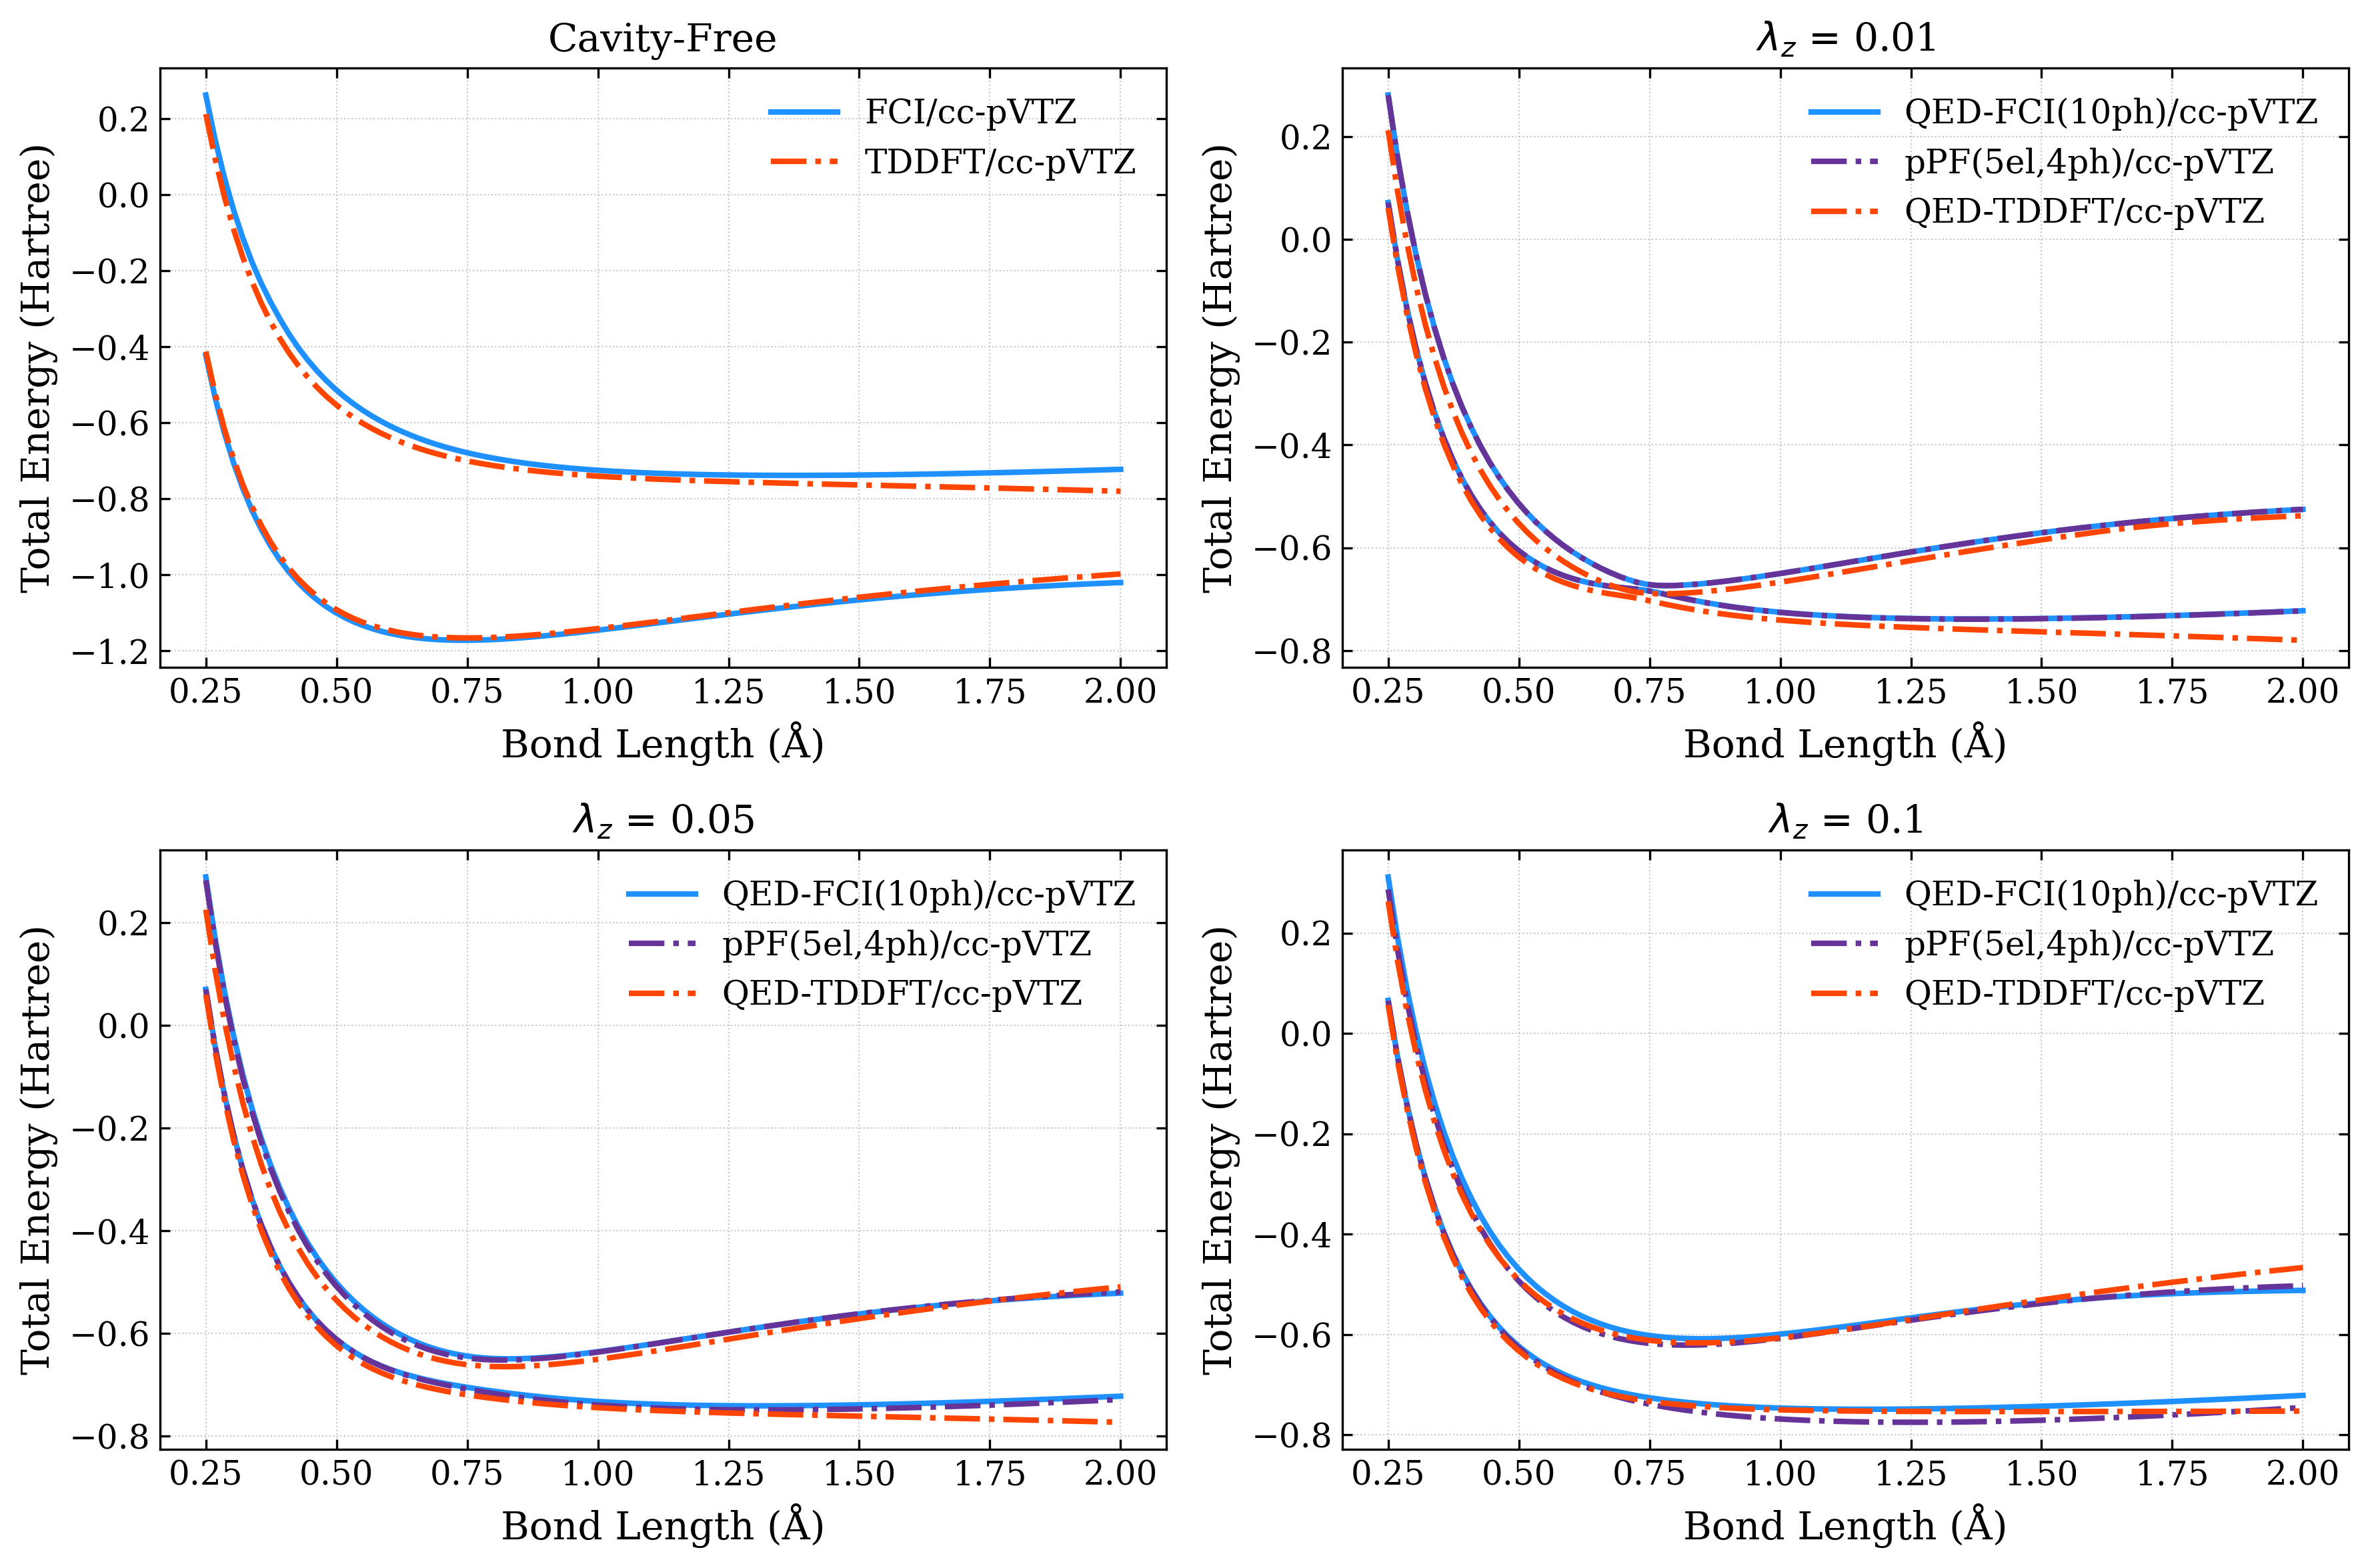

In [6]:
# this block will plot the PES at lz = 0 and select lz values for all levels of theory as a 4 panel figure
# and will also get the equilibrium geometries for each level of theory and coupling condition 
# and store in the dictionary

import matplotlib.pyplot as plt
import matplotlib as mpl

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})

# Colors and styles
color3 = "rebeccapurple"
color2 = "salmon"
color1 = "forestgreen"
color4 = "dodgerblue"
color5 = "orangered"

styles = {
    "QED-FCI": {"color": color4, "linestyle": "-"},
    "PQED": {"color": color1, "linestyle": "-"},
    "PQEDMin": {"color": color3, "linestyle": "-."},
    "QED-TDDFT": {"color": color5, "linestyle": "-."}
}

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

### Panel 1: Cavity-free
ax = axes[0]
ax.plot(bondlength_scan_vals, qed_ci[0][:, 0], label=r"FCI/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[0][:, 2], **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, tddft_S0, label=r"TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_S1, **styles["QED-TDDFT"])
ax.set_title("Cavity-Free")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# get arguments for minimum value for QED-CI PES
qed_ci_S0_argmin = np.argmin(qed_ci[0][:,0])
qed_ci_S1_argmin = np.argmin(qed_ci[0][:,2])

# get arguments for minimum value for QED-TDDFT PES
qed_tddft_S0_argmin = np.argmin(tddft_S0)
qed_tddft_S1_argmin = np.argmin(tddft_S1)

# fill in equilibrium geometries in results dictionary
results["QED-FCI(10ph)"]["No Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_ci_S0_argmin]
results["QED-FCI(10ph)"]["No Coupling"]["geometry"]["S1"] = bondlength_scan_vals[qed_ci_S1_argmin]
results["QED-TDDFT(2ph)"]["No Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_tddft_S0_argmin]
results["QED-TDDFT(2ph)"]["No Coupling"]["geometry"]["S1"] = bondlength_scan_vals[qed_tddft_S1_argmin]

### Panel 2: lz = 0.01
ax = axes[1]
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_lp_index], label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_up_index], **styles["QED-FCI"])
#ax.plot(bondlength_scan_vals, pqed[1][:, pqed_lp_index], label=r"pPF(200el,10ph)/cc-pVTZ", **styles["PQED"])
#ax.plot(bondlength_scan_vals, pqed[1][:, pqed_up_index], **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_lp_index], label=r"pPF(5el,4ph)/cc-pVTZ", **styles["PQEDMin"])
ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_up_index], **styles["PQEDMin"])
ax.plot(bondlength_scan_vals, tddft_lp_lz_p01, label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p01, **styles["QED-TDDFT"])
ax.set_title("$\lambda_z$ = 0.01")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)


# get arguments for minimum value for QED-CI PES
qed_ci_S0_argmin = np.argmin(qed_ci[1][:,0])
qed_ci_LP_argmin = np.argmin(qed_ci[1][:, ci_lp_index])
qed_ci_UP_argmin = np.argmin(qed_ci[1][:, ci_up_index])

# get arguments for minimum value for pQED minimal
pQEDmin_S0_argmin = np.argmin(pqed_minimal[1][:, 0])
pQEDmin_LP_argmin = np.argmin(pqed_minimal[1][:, pqed_minimal_lp_index])
pQEDmin_UP_argmin = np.argmin(pqed_minimal[1][:, pqed_minimal_up_index])

# get arguments for minimum value for pQED 
pQED_S0_argmin = np.argmin(pqed[1][:, 0])
pQED_LP_argmin = np.argmin(pqed[1][:, pqed_lp_index])
pQED_UP_argmin = np.argmin(pqed[1][:, pqed_up_index])



# get arguments for minimum value for QED-TDDFT PES
qed_tddft_S0_argmin = np.argmin(tddft_S0)
qed_tddft_LP_argmin = np.argmin(tddft_lp_lz_p01)
qed_tddft_UP_argmin = np.argmin(tddft_up_lz_p01)

# fill in equilibrium geometries in results dictionary
results["QED-FCI(10ph)"]["Weak Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_ci_S0_argmin]
results["QED-FCI(10ph)"]["Weak Coupling"]["geometry"]["LP"] = bondlength_scan_vals[qed_ci_LP_argmin]
results["QED-FCI(10ph)"]["Weak Coupling"]["geometry"]["UP"] = bondlength_scan_vals[qed_ci_UP_argmin]

results["pPF(5el,4ph)"]["Weak Coupling"]["geometry"]["S0"] = bondlength_scan_vals[pQEDmin_S0_argmin]
results["pPF(5el,4ph)"]["Weak Coupling"]["geometry"]["LP"] = bondlength_scan_vals[pQEDmin_LP_argmin]
results["pPF(5el,4ph)"]["Weak Coupling"]["geometry"]["UP"] = bondlength_scan_vals[pQEDmin_UP_argmin]

results["pPF(100el,10ph)"]["Weak Coupling"]["geometry"]["S0"] = bondlength_scan_vals[pQED_S0_argmin]
results["pPF(100el,10ph)"]["Weak Coupling"]["geometry"]["LP"] = bondlength_scan_vals[pQED_LP_argmin]
results["pPF(100el,10ph)"]["Weak Coupling"]["geometry"]["UP"] = bondlength_scan_vals[pQED_UP_argmin]

results["QED-TDDFT(2ph)"]["Weak Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_tddft_S0_argmin]
results["QED-TDDFT(2ph)"]["Weak Coupling"]["geometry"]["LP"] = bondlength_scan_vals[qed_tddft_LP_argmin]
results["QED-TDDFT(2ph)"]["Weak Coupling"]["geometry"]["UP"] = bondlength_scan_vals[qed_tddft_UP_argmin]


### Panel 3: lz = 0.05
ax = axes[2]
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_lp_index], label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_up_index], **styles["QED-FCI"])
#ax.plot(bondlength_scan_vals, pqed[5][:, pqed_lp_index], label=r"pPF(200el,10ph)/cc-pVTZ", **styles["PQED"])
#ax.plot(bondlength_scan_vals, pqed[5][:, pqed_up_index], **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_lp_index], label=r"pPF(5el,4ph)/cc-pVTZ", **styles["PQEDMin"])
ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_up_index], **styles["PQEDMin"])
ax.plot(bondlength_scan_vals, tddft_lp_lz_p05, label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p05, **styles["QED-TDDFT"])
ax.set_title("$\lambda_z$ = 0.05")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)


# get arguments for minimum value for QED-CI PES
qed_ci_S0_argmin = np.argmin(qed_ci[5][:,0])
qed_ci_LP_argmin = np.argmin(qed_ci[5][:, ci_lp_index])
qed_ci_UP_argmin = np.argmin(qed_ci[5][:, ci_up_index])

# get arguments for minimum value for pQED minimal
pQEDmin_S0_argmin = np.argmin(pqed_minimal[5][:, 0])
pQEDmin_LP_argmin = np.argmin(pqed_minimal[5][:, pqed_minimal_lp_index])
pQEDmin_UP_argmin = np.argmin(pqed_minimal[5][:, pqed_minimal_up_index])

# get arguments for minimum value for pQED 
pQED_S0_argmin = np.argmin(pqed[5][:, 0])
pQED_LP_argmin = np.argmin(pqed[5][:, pqed_lp_index])
pQED_UP_argmin = np.argmin(pqed[5][:, pqed_up_index])



# get arguments for minimum value for QED-TDDFT PES
qed_tddft_S0_argmin = np.argmin(tddft_S0)
qed_tddft_LP_argmin = np.argmin(tddft_lp_lz_p05)
qed_tddft_UP_argmin = np.argmin(tddft_up_lz_p05)

# fill in equilibrium geometries in results dictionary
results["QED-FCI(10ph)"]["Medium Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_ci_S0_argmin]
results["QED-FCI(10ph)"]["Medium Coupling"]["geometry"]["LP"] = bondlength_scan_vals[qed_ci_LP_argmin]
results["QED-FCI(10ph)"]["Medium Coupling"]["geometry"]["UP"] = bondlength_scan_vals[qed_ci_UP_argmin]

results["pPF(5el,4ph)"]["Medium Coupling"]["geometry"]["S0"] = bondlength_scan_vals[pQEDmin_S0_argmin]
results["pPF(5el,4ph)"]["Medium Coupling"]["geometry"]["LP"] = bondlength_scan_vals[pQEDmin_LP_argmin]
results["pPF(5el,4ph)"]["Medium Coupling"]["geometry"]["UP"] = bondlength_scan_vals[pQEDmin_UP_argmin]

results["pPF(100el,10ph)"]["Medium Coupling"]["geometry"]["S0"] = bondlength_scan_vals[pQED_S0_argmin]
results["pPF(100el,10ph)"]["Medium Coupling"]["geometry"]["LP"] = bondlength_scan_vals[pQED_LP_argmin]
results["pPF(100el,10ph)"]["Medium Coupling"]["geometry"]["UP"] = bondlength_scan_vals[pQED_UP_argmin]

results["QED-TDDFT(2ph)"]["Medium Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_tddft_S0_argmin]
results["QED-TDDFT(2ph)"]["Medium Coupling"]["geometry"]["LP"] = bondlength_scan_vals[qed_tddft_LP_argmin]
results["QED-TDDFT(2ph)"]["Medium Coupling"]["geometry"]["UP"] = bondlength_scan_vals[qed_tddft_UP_argmin]


### Panel 4: lz = 0.1
ax = axes[3]
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_lp_index], label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_up_index], **styles["QED-FCI"])
#ax.plot(bondlength_scan_vals, pqed[10][:, pqed_lp_index], label=r"pPF(200el,10ph)/cc-pVTZ", **styles["PQED"])
#ax.plot(bondlength_scan_vals, pqed[10][:, pqed_up_index], **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_lp_index], label=r"pPF(5el,4ph)/cc-pVTZ", **styles["PQEDMin"])
ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_up_index], **styles["PQEDMin"])
ax.plot(bondlength_scan_vals, tddft_lp_lz_p1, label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p1, **styles["QED-TDDFT"])
ax.set_title("$\lambda_z$ = 0.1")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Layout and save/show
fig.tight_layout()
# fig.savefig("qed_methods_4panel.pdf", format="pdf")
fig.savefig("h2_pes_4panel.png", format="png", dpi=600)
plt.show()


# get arguments for minimum value for QED-CI PES
qed_ci_S0_argmin = np.argmin(qed_ci[10][:,0])
qed_ci_LP_argmin = np.argmin(qed_ci[10][:, ci_lp_index])
qed_ci_UP_argmin = np.argmin(qed_ci[10][:, ci_up_index])

# get arguments for minimum value for pQED minimal
pQEDmin_S0_argmin = np.argmin(pqed_minimal[10][:, 0])
pQEDmin_LP_argmin = np.argmin(pqed_minimal[10][:, pqed_minimal_lp_index])
pQEDmin_UP_argmin = np.argmin(pqed_minimal[10][:, pqed_minimal_up_index])

# get arguments for minimum value for pQED 
pQED_S0_argmin = np.argmin(pqed[10][:, 0])
pQED_LP_argmin = np.argmin(pqed[10][:, pqed_lp_index])
pQED_UP_argmin = np.argmin(pqed[10][:, pqed_up_index])



# get arguments for minimum value for QED-TDDFT PES
qed_tddft_S0_argmin = np.argmin(tddft_S0)
qed_tddft_LP_argmin = np.argmin(tddft_lp_lz_p1)
qed_tddft_UP_argmin = np.argmin(tddft_up_lz_p1)

# fill in equilibrium geometries in results dictionary
results["QED-FCI(10ph)"]["Strong Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_ci_S0_argmin]
results["QED-FCI(10ph)"]["Strong Coupling"]["geometry"]["LP"] = bondlength_scan_vals[qed_ci_LP_argmin]
results["QED-FCI(10ph)"]["Strong Coupling"]["geometry"]["UP"] = bondlength_scan_vals[qed_ci_UP_argmin]

results["pPF(5el,4ph)"]["Strong Coupling"]["geometry"]["S0"] = bondlength_scan_vals[pQEDmin_S0_argmin]
results["pPF(5el,4ph)"]["Strong Coupling"]["geometry"]["LP"] = bondlength_scan_vals[pQEDmin_LP_argmin]
results["pPF(5el,4ph)"]["Strong Coupling"]["geometry"]["UP"] = bondlength_scan_vals[pQEDmin_UP_argmin]

results["pPF(100el,10ph)"]["Strong Coupling"]["geometry"]["S0"] = bondlength_scan_vals[pQED_S0_argmin]
results["pPF(100el,10ph)"]["Strong Coupling"]["geometry"]["LP"] = bondlength_scan_vals[pQED_LP_argmin]
results["pPF(100el,10ph)"]["Strong Coupling"]["geometry"]["UP"] = bondlength_scan_vals[pQED_UP_argmin]

results["QED-TDDFT(2ph)"]["Strong Coupling"]["geometry"]["S0"] = bondlength_scan_vals[qed_tddft_S0_argmin]
results["QED-TDDFT(2ph)"]["Strong Coupling"]["geometry"]["LP"] = bondlength_scan_vals[qed_tddft_LP_argmin]
results["QED-TDDFT(2ph)"]["Strong Coupling"]["geometry"]["UP"] = bondlength_scan_vals[qed_tddft_UP_argmin]



In [7]:
# This block will compute the Franck-Condon Limits, Huang-Rhys factors, and fundamental vibrational
# frequencies from the QED-TDDFT results at lz = 0 and select lz > 0 values
# qed-tddft
fcf_limit_s0_lp_qedtddft = []
fcf_limit_s0_up_qedtddft = []

HRs_S0_lp_qedtddft =[]
HRs_S0_up_qedtddft =[]


fund_S0_qeddft = []
fund_S1_qeddft = []
fund_LP_qeddft = [0]
fund_UP_qeddft = [0]

 


# tddft S0 and S1
#tddft_S0, tddft_S1

# polariton states
# tddft_lp_lz_p01, tddft_up_lz_p01, tddft_lp_lz_p05, tddft_up_lz_p05, tddft_lp_lz_p1, tddft_up_lz_p1
# handle qed-tddft fcf separately because the PES are organized differently

# cavity free 
## FCF
_temp = get_fcf_matrix(tddft_S0, tddft_S1,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))

# freq S0
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_S0, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_S0_qeddft.append(vals[1]-vals[0])

# freq S1
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_S1, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_S1_qeddft.append(vals[1]-vals[0])

# HR
HRs_S0_lp_qedtddft.append(calculate_HR(tddft_S0, tddft_S1, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
HRs_S0_up_qedtddft.append(calculate_HR(tddft_S0, tddft_S1, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

# lz = 0.01
# FCF                    
_temp = get_fcf_matrix(tddft_S0, tddft_lp_lz_p01,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
_temp = get_fcf_matrix(tddft_S0, tddft_up_lz_p01,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))

# freq S0
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_S0, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_S0_qeddft.append(vals[1]-vals[0])

# freq LP
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_lp_lz_p01, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_LP_qeddft.append(vals[1]-vals[0])

# freq UP
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_up_lz_p01, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_UP_qeddft.append(vals[1]-vals[0])

# HR
HRs_S0_lp_qedtddft.append(calculate_HR(tddft_S0, tddft_lp_lz_p01, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
HRs_S0_up_qedtddft.append(calculate_HR(tddft_S0, tddft_up_lz_p01, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))


# fill in zeros for lz = 0.02, 0.03, 0.04
for i in range(3):
    fcf_limit_s0_lp_qedtddft.append(0.0)
    fcf_limit_s0_up_qedtddft.append(0.0)
    HRs_S0_lp_qedtddft.append(0.0)
    HRs_S0_up_qedtddft.append(0.0)
    fund_S0_qeddft.append(0.0)
    fund_LP_qeddft.append(0.0)
    fund_UP_qeddft.append(0.0)

# lz = 0.05
## FCF
_temp = get_fcf_matrix(tddft_S0, tddft_lp_lz_p05,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
_temp = get_fcf_matrix(tddft_S0, tddft_up_lz_p05,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))

## HR
HRs_S0_lp_qedtddft.append(calculate_HR(tddft_S0, tddft_lp_lz_p05, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
HRs_S0_up_qedtddft.append(calculate_HR(tddft_S0, tddft_up_lz_p05, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

# freq S0
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_S0, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_S0_qeddft.append(vals[1]-vals[0])

# freq LP
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_lp_lz_p05, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_LP_qeddft.append(vals[1]-vals[0])

# freq UP
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_up_lz_p05, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_UP_qeddft.append(vals[1]-vals[0])

# HR


# fill in zeros for lz = 0.06, 0.07, 0.08, 0.09
for i in range(4):
    fcf_limit_s0_lp_qedtddft.append(0.0)
    fcf_limit_s0_up_qedtddft.append(0.0)
    HRs_S0_lp_qedtddft.append(0.0)
    HRs_S0_up_qedtddft.append(0.0)
    fund_S0_qeddft.append(0.0)
    fund_LP_qeddft.append(0.0)
    fund_UP_qeddft.append(0.0)

# lz = 0.1

# FCF
_temp = get_fcf_matrix(tddft_S0, tddft_lp_lz_p1,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
_temp = get_fcf_matrix(tddft_S0, tddft_up_lz_p1,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))

fcf_limit_s0_lp_qedtddft = np.array(fcf_limit_s0_lp_qedtddft)
fcf_limit_s0_up_qedtddft = np.array(fcf_limit_s0_up_qedtddft)

## HR
HRs_S0_lp_qedtddft.append(calculate_HR(tddft_S0, tddft_lp_lz_p1, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
HRs_S0_up_qedtddft.append(calculate_HR(tddft_S0, tddft_up_lz_p1, r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

HRs_S0_lp_qedtddft = np.array(HRs_S0_lp_qedtddft)
HRs_S0_up_qedtddft = np.array(HRs_S0_up_qedtddft)


# freq S0
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_S0, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_S0_qeddft.append(vals[1]-vals[0])

# freq LP
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_lp_lz_p1, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_LP_qeddft.append(vals[1]-vals[0])

# freq UP
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, tddft_up_lz_p1, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_UP_qeddft.append(vals[1]-vals[0])

IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.01864189341603062


NameError: name 'bondlength_scan_vals_bohr' is not defined

In [8]:
# This block will compute the Franck-Condon Limits, Huang-Rhys factors, and fundamental vibrational
# frequencies from the QED-FCI, pQED, and pQED minimal results at lz = 0 and select lz > 0 values


np.set_printoptions(precision = 3)
# qed-ci
fcf_limit_s0_lp_ci = []
fcf_limit_s0_up_ci = []


# pqed
fcf_limit_s0_lp_pqed = []
fcf_limit_s0_up_pqed = []

# pqed minimal 
fcf_limit_s0_lp_pqed_minimal = []
fcf_limit_s0_up_pqed_minimal = []

# qed-ci
HRs_S0_lp_ci =[]
HRs_S0_up_ci = []


# pqed
HRs_S0_lp_pqed =[]
HRs_S0_up_pqed= []

# pqed minimal
HRs_S0_lp_pqed_minimal =[]
HRs_S0_up_pqed_minimal = []


# frequencies - offset polaritons with a zero because these states don't exist for lambda_z = 0 case
fund_S0_ci = []
fund_S1_ci = []
fund_LP_ci = [0]
fund_UP_ci = [0]

fund_S0_pqed = []
fund_S1_pqed = []
fund_LP_pqed = [0]
fund_UP_pqed = [0]

fund_S0_pqed_min = []
fund_S1_pqed_min = []
fund_LP_pqed_min = [0]
fund_UP_pqed_min = [0]

index_pes = 0

# pqed and pqed_min = ci when lambda = 0
vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, qed_ci[index_pes][:,  0 ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_S0_ci.append(vals[1]-vals[0])
fund_S0_pqed.append(vals[1]-vals[0])
fund_S0_pqed_min.append(vals[1]-vals[0])

vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, qed_ci[index_pes][:,  2 ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
fund_S1_ci.append(vals[1]-vals[0])
fund_S1_pqed.append(vals[1]-vals[0])
fund_S1_pqed_min.append(vals[1]-vals[0])


for lambda_val in lambda_values:
    print("Lambda value:", lambda_val)


    #s0 to LP
    fcf_s0_lp = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_ci.append(( fcf_s0_lp[0,0] / (1 - fcf_s0_lp[0,0]) ) )
    fcf_limit_s0_up_ci.append(( fcf_s0_up[0,0] / (1 - fcf_s0_up[0,0]) ) )


    fcf_s0_lp = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed.append(( fcf_s0_lp[0,0] / (1 - fcf_s0_lp[0,0]) ) )
    fcf_limit_s0_up_pqed.append(( fcf_s0_up[0,0] / (1 - fcf_s0_up[0,0]) ) )


    fcf_s0_lp = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed_minimal.append(( fcf_s0_lp[0,0] / (1 - fcf_s0_lp[0,0]) ) )
    fcf_limit_s0_up_pqed_minimal.append(( fcf_s0_up[0,0] / (1 - fcf_s0_up[0,0]) ) )



        #s0 to LP
    
    HRs_S0_lp_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    
    # qed-ci frequencies of lz > 0
    if index_pes > 0:
        
        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, qed_ci[index_pes][:,  0 ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_S0_ci.append(vals[1]-vals[0])

        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, qed_ci[index_pes][:,  ci_lp_index ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_LP_ci.append(vals[1]-vals[0])

        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, qed_ci[index_pes][:,  ci_up_index ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_UP_ci.append(vals[1]-vals[0])
        
        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, pqed[index_pes][:,  0 ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_S0_pqed.append(vals[1]-vals[0])

        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, pqed[index_pes][:,  pqed_lp_index ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_LP_pqed.append(vals[1]-vals[0])

        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, pqed[index_pes][:,  pqed_up_index ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_UP_pqed.append(vals[1]-vals[0])
        
        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, pqed_minimal[index_pes][:,  0 ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_S0_pqed_min.append(vals[1]-vals[0])

        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, pqed_minimal[index_pes][:,  pqed_minimal_lp_index ], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_LP_pqed_min.append(vals[1]-vals[0])

        vals, vecs = get_fd_wfn(bondlength_scan_vals_bohr, pqed_minimal[index_pes][:,  pqed_minimal_up_index], use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)
        fund_UP_pqed_min.append(vals[1]-vals[0])
        

    index_pes+=1

fcf_limit_s0_lp_ci = np.array(fcf_limit_s0_lp_ci)
fcf_limit_s0_up_ci =np.array(fcf_limit_s0_up_ci)

fcf_limit_s0_lp_pqed = np.array(fcf_limit_s0_lp_pqed)
fcf_limit_s0_up_pqed = np.array(fcf_limit_s0_up_pqed)

fcf_limit_s0_lp_pqed_minimal = np.array(fcf_limit_s0_lp_pqed_minimal )
fcf_limit_s0_up_pqed_minimal = np.array(fcf_limit_s0_up_pqed_minimal)


HRs_S0_lp_ci =np.array(HRs_S0_lp_ci )
HRs_S0_up_ci = np.array(HRs_S0_up_ci)

HRs_S0_lp_pqed =np.array(HRs_S0_lp_pqed)
HRs_S0_up_pqed= np.array(HRs_S0_up_pqed)

HRs_S0_lp_pqed_minimal =np.array(HRs_S0_lp_pqed_minimal)
HRs_S0_up_pqed_minimal = np.array(HRs_S0_up_pqed_minimal )




NameError: name 'bondlength_scan_vals_bohr' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"
TDDFTCOLOUR = "orange"

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]

fcl_tddft = fcf_limit_s0_lp_qedtddft[indices]


barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]






# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]

fcl_tddft = fcf_limit_s0_up_qedtddft[indices]




In [9]:

# store the FC factors to the dictionary

# no coupling
results["QED-FCI(10ph)"]["No Coupling"]["spectroscopic_factors"]["FC"]["S0","S1"] = fcf_limit_s0_up_ci[0]
results["pPF(100el,10ph)"]["No Coupling"]["spectroscopic_factors"]["FC"]["S0","S1"] = fcf_limit_s0_up_pqed[0]
results["pPF(5el,4ph)"]["No Coupling"]["spectroscopic_factors"]["FC"]["S0","S1"] = fcf_limit_s0_up_pqed_minimal[0]
results["QED-TDDFT(2ph)"]["No Coupling"]["spectroscopic_factors"]["FC"]["S0","S1"] = fcf_limit_s0_up_qedtddft[0]

results["QED-FCI(10ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_ci[1]
results["pPF(100el,10ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_pqed[1]
results["pPF(5el,4ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_pqed_minimal[1]
results["QED-TDDFT(2ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_qedtddft[1]

results["QED-FCI(10ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_ci[5]
results["pPF(100el,10ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_pqed[5]
results["pPF(5el,4ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_pqed_minimal[5]
results["QED-TDDFT(2ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_qedtddft[5]

results["QED-FCI(10ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_ci[10]
results["pPF(100el,10ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_pqed[10]
results["pPF(5el,4ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_pqed_minimal[10]
results["QED-TDDFT(2ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","LP"] = fcf_limit_s0_lp_qedtddft[10]

results["QED-FCI(10ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_ci[1]
results["pPF(100el,10ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_pqed[1]
results["pPF(5el,4ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_pqed_minimal[1]
results["QED-TDDFT(2ph)"]["Weak Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_qedtddft[1]

results["QED-FCI(10ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_ci[5]
results["pPF(100el,10ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_pqed[5]
results["pPF(5el,4ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_pqed_minimal[5]
results["QED-TDDFT(2ph)"]["Medium Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_qedtddft[5]

results["QED-FCI(10ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_ci[10]
results["pPF(100el,10ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_pqed[10]
results["pPF(5el,4ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_pqed_minimal[10]
results["QED-TDDFT(2ph)"]["Strong Coupling"]["spectroscopic_factors"]["FC"]["S0","UP"] = fcf_limit_s0_up_qedtddft[10]

# store the HR factors to the dictionary
results["QED-FCI(10ph)"]["No Coupling"]["spectroscopic_factors"]["HR"]["S0","S1"] = HRs_S0_up_ci[0]
results["pPF(100el,10ph)"]["No Coupling"]["spectroscopic_factors"]["HR"]["S0","S1"] = HRs_S0_up_pqed[0]
results["pPF(5el,4ph)"]["No Coupling"]["spectroscopic_factors"]["HR"]["S0","S1"] = HRs_S0_up_pqed_minimal[0]
results["QED-TDDFT(2ph)"]["No Coupling"]["spectroscopic_factors"]["HR"]["S0","S1"] = HRs_S0_up_qedtddft[0]

results["QED-FCI(10ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_ci[1]
results["pPF(100el,10ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_pqed[1]
results["pPF(5el,4ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_pqed_minimal[1]
results["QED-TDDFT(2ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_qedtddft[1]

results["QED-FCI(10ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_ci[5]
results["pPF(100el,10ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_pqed[5]
results["pPF(5el,4ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_pqed_minimal[5]
results["QED-TDDFT(2ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_qedtddft[5]

results["QED-FCI(10ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_ci[10]
results["pPF(100el,10ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_pqed[10]
results["pPF(5el,4ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_pqed_minimal[10]
results["QED-TDDFT(2ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","LP"] = HRs_S0_lp_qedtddft[10]


results["QED-FCI(10ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_ci[1]
results["pPF(100el,10ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_pqed[1]
results["pPF(5el,4ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_pqed_minimal[1]
results["QED-TDDFT(2ph)"]["Weak Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_qedtddft[1]

results["QED-FCI(10ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_ci[5]
results["pPF(100el,10ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_pqed[5]
results["pPF(5el,4ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_pqed_minimal[5]
results["QED-TDDFT(2ph)"]["Medium Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_qedtddft[5]

results["QED-FCI(10ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_ci[10]
results["pPF(100el,10ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_pqed[10]
results["pPF(5el,4ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_pqed_minimal[10]
results["QED-TDDFT(2ph)"]["Strong Coupling"]["spectroscopic_factors"]["HR"]["S0","UP"] = HRs_S0_up_qedtddft[10]


### Store the frequencies to a dictionary
results["QED-FCI(10ph)"]["No Coupling"]["frequency"]["S0"] = fund_S0_ci[0] * au_to_wn
results["QED-FCI(10ph)"]["No Coupling"]["frequency"]["S1"] = fund_S1_ci[0]* au_to_wn

results["pPF(100el,10ph)"]["No Coupling"]["frequency"]["S0"] = fund_S0_ci[0]* au_to_wn
results["pPF(100el,10ph)"]["No Coupling"]["frequency"]["S1"] = fund_S1_ci[0]* au_to_wn

results["pPF(5el,4ph)"]["No Coupling"]["frequency"]["S0"] = fund_S0_ci[0]* au_to_wn
results["pPF(5el,4ph)"]["No Coupling"]["frequency"]["S1"] = fund_S1_ci[0]* au_to_wn

results["QED-TDDFT(2ph)"]["No Coupling"]["frequency"]["S0"] = fund_S0_qeddft[0]* au_to_wn
results["QED-TDDFT(2ph)"]["No Coupling"]["frequency"]["S1"] = fund_S1_qeddft[0]* au_to_wn

### Frequencies - weak coupling
results["QED-FCI(10ph)"]["Weak Coupling"]["frequency"]["S0"] = fund_S0_ci[1]* au_to_wn
results["QED-FCI(10ph)"]["Weak Coupling"]["frequency"]["LP"] = fund_LP_ci[1]* au_to_wn
results["QED-FCI(10ph)"]["Weak Coupling"]["frequency"]["UP"] = fund_UP_ci[1]* au_to_wn


results["pPF(100el,10ph)"]["Weak Coupling"]["frequency"]["S0"] = fund_S0_pqed[1]* au_to_wn
results["pPF(100el,10ph)"]["Weak Coupling"]["frequency"]["LP"] = fund_LP_pqed[1]* au_to_wn
results["pPF(100el,10ph)"]["Weak Coupling"]["frequency"]["UP"] = fund_UP_pqed[1]* au_to_wn

results["pPF(5el,4ph)"]["Weak Coupling"]["frequency"]["S0"] = fund_S0_pqed_min[1]* au_to_wn
results["pPF(5el,4ph)"]["Weak Coupling"]["frequency"]["LP"] = fund_LP_pqed_min[1]* au_to_wn
results["pPF(5el,4ph)"]["Weak Coupling"]["frequency"]["UP"] = fund_UP_pqed_min[1]* au_to_wn

results["QED-TDDFT(2ph)"]["Weak Coupling"]["frequency"]["S0"] = fund_S0_qeddft[1]* au_to_wn
results["QED-TDDFT(2ph)"]["Weak Coupling"]["frequency"]["LP"] = fund_LP_qeddft[1]* au_to_wn
results["QED-TDDFT(2ph)"]["Weak Coupling"]["frequency"]["UP"] = fund_UP_qeddft[1]* au_to_wn


### Frequencies - medium coupling
results["QED-FCI(10ph)"]["Medium Coupling"]["frequency"]["S0"] = fund_S0_ci[5]* au_to_wn
results["QED-FCI(10ph)"]["Medium Coupling"]["frequency"]["LP"] = fund_LP_ci[5]* au_to_wn
results["QED-FCI(10ph)"]["Medium Coupling"]["frequency"]["UP"] = fund_UP_ci[5]


results["pPF(100el,10ph)"]["Medium Coupling"]["frequency"]["S0"] = fund_S0_pqed[5]* au_to_wn
results["pPF(100el,10ph)"]["Medium Coupling"]["frequency"]["LP"] = fund_LP_pqed[5]* au_to_wn
results["pPF(100el,10ph)"]["Medium Coupling"]["frequency"]["UP"] = fund_UP_pqed[5]* au_to_wn

results["pPF(5el,4ph)"]["Medium Coupling"]["frequency"]["S0"] = fund_S0_pqed_min[5]* au_to_wn
results["pPF(5el,4ph)"]["Medium Coupling"]["frequency"]["LP"] = fund_LP_pqed_min[5]* au_to_wn
results["pPF(5el,4ph)"]["Medium Coupling"]["frequency"]["UP"] = fund_UP_pqed_min[5]* au_to_wn

results["QED-TDDFT(2ph)"]["Medium Coupling"]["frequency"]["S0"] = fund_S0_qeddft[5]* au_to_wn
results["QED-TDDFT(2ph)"]["Medium Coupling"]["frequency"]["LP"] = fund_LP_qeddft[5]* au_to_wn
results["QED-TDDFT(2ph)"]["Medium Coupling"]["frequency"]["UP"] = fund_UP_qeddft[5]* au_to_wn

### Frequencies - strong coupling
results["QED-FCI(10ph)"]["Strong Coupling"]["frequency"]["S0"] = fund_S0_ci[10]* au_to_wn
results["QED-FCI(10ph)"]["Strong Coupling"]["frequency"]["LP"] = fund_LP_ci[10]* au_to_wn
results["QED-FCI(10ph)"]["Strong Coupling"]["frequency"]["UP"] = fund_UP_ci[10]* au_to_wn


results["pPF(100el,10ph)"]["Strong Coupling"]["frequency"]["S0"] = fund_S0_pqed[10]* au_to_wn
results["pPF(100el,10ph)"]["Strong Coupling"]["frequency"]["LP"] = fund_LP_pqed[10]* au_to_wn
results["pPF(100el,10ph)"]["Strong Coupling"]["frequency"]["UP"] = fund_UP_pqed[10]* au_to_wn

results["pPF(5el,4ph)"]["Strong Coupling"]["frequency"]["S0"] = fund_S0_pqed_min[10]* au_to_wn
results["pPF(5el,4ph)"]["Strong Coupling"]["frequency"]["LP"] = fund_LP_pqed_min[10]* au_to_wn
results["pPF(5el,4ph)"]["Strong Coupling"]["frequency"]["UP"] = fund_UP_pqed_min[10]* au_to_wn

results["QED-TDDFT(2ph)"]["Strong Coupling"]["frequency"]["S0"] = fund_S0_qeddft[10]* au_to_wn
results["QED-TDDFT(2ph)"]["Strong Coupling"]["frequency"]["LP"] = fund_LP_qeddft[10]* au_to_wn
results["QED-TDDFT(2ph)"]["Strong Coupling"]["frequency"]["UP"] = fund_UP_qeddft[10]* au_to_wn

IndexError: list index out of range

In [ ]:
def format_latex_sci(value):
    """Formats a scalar in scientific notation using LaTeX math syntax."""
    if value is None:
        return "-"
    coeff, exp = f"{value:.2e}".split("e")
    exp = int(exp)  # remove leading zeros and + sign
    return f"${coeff} \\times 10^{{{exp}}}$"

print("\\begin{tabular}{llll}")
print("\\hline")
print(" & Method & State Pair & Franck-Condon Limit & Huang-Rhys Factor \\\\")
print("\\hline")

# Order of coupling levels for display
coupling_order = ["No Coupling", "Weak Coupling", "Medium Coupling", "Strong Coupling"]

for coupling in coupling_order:
    print(f"\\multicolumn{{4}}{{l}}{{\\textbf{{{coupling}}}}} \\\\")

    for method, method_data in results.items():
        if coupling not in method_data:
            continue  # Skip if method doesn't have this coupling case

        fc_data = method_data[coupling]["spectroscopic_factors"]["FC"]
        hr_data = method_data[coupling]["spectroscopic_factors"]["HR"]

        for (s0, sx) in fc_data:
            fc_str = format_latex_sci(fc_data[(s0, sx)])
            hr_str = format_latex_sci(hr_data.get((s0, sx)))
            print(f" & {method} & {s0}$\\rightarrow${sx} & {fc_str} & {hr_str} \\\\")

print("\\hline")
print("\\end{tabular}")




In [ ]:
def format_scalar(value):
    """Formats a scalar for LaTeX, or returns '-' if None."""
    return "-" if value is None else f"{value:.3f}"

print("\\begin{tabular}{llll}")
print("\\hline")
print(" & Method & Geometry & Frequency \\\\")
print("\\hline")

au_to_incm = 219474.602894
# Define display order of coupling blocks
coupling_order = ["No Coupling", "Weak Coupling", "Medium Coupling", "Strong Coupling"]

# Sort states in a consistent physical order
state_order = ["S0", "S1", "LP", "UP"]

# Define your method order or sort alphabetically
method_order = ["QED-FCI(10ph)", "pPF(5el,4ph)", "pPF(100el,10ph)", "QED-TDDFT(2ph)", "QED-CCSD(2ph)"]

for coupling in coupling_order:
    print(f"\\multicolumn{{4}}{{l}}{{\\textbf{{{coupling}}}}} \\\\")

    for state in state_order:
        # Determine whether this state exists in this coupling regime
        any_method_has_state = any(
            coupling in method_data and state in method_data[coupling]["geometry"]
            for method_data in results.values()
        )
        if not any_method_has_state:
            continue

        print(f"\\textit{{State: {state}}} \\\\")

        for method in method_order:
            method_data = results.get(method, {})
            if coupling not in method_data:
                continue
            state_data = method_data[coupling]

            if state not in state_data["geometry"]:
                continue

            geom = format_scalar(state_data["geometry"].get(state))
            freq = format_scalar(state_data["frequency"].get(state))
            print(f" & {method} & {geom} & {freq} \\\\")

print("\\hline")
print("\\end{tabular}")


In [ ]:
def format_latex_sci(value):
    """Formats a scalar in scientific notation using LaTeX math syntax."""
    if value is None:
        return "-"
    coeff, exp = f"{value:.2e}".split("e")
    exp = int(exp)
    return f"${coeff} \\times 10^{{{exp}}}$"

# Group definitions by coupling and state pair
coupling_order = [
    ("No Coupling", [("S0", "S1")]),
    ("Weak Coupling", [("S0", "LP"), ("S0", "UP")]),
    ("Medium Coupling", [("S0", "LP"), ("S0", "UP")]),
    ("Strong Coupling", [("S0", "LP"), ("S0", "UP")]),
]

print("\\begin{tabular}{llll}")
print("\\hline")
print(" & Method & Franck-Condon Limit & Huang-Rhys Factor \\\\")
print("\\hline")

for coupling_label, state_pairs in coupling_order:
    for (s0, sx) in state_pairs:
        section_label = f"{coupling_label}, ${s0} \\rightarrow {sx}$"
        print(f"\\multicolumn{{4}}{{l}}{{\\textbf{{{section_label}}}}} \\\\")

        for method, method_data in results.items():
            if coupling_label not in method_data:
                continue
            fc_val = method_data[coupling_label]["spectroscopic_factors"]["FC"].get((s0, sx))
            hr_val = method_data[coupling_label]["spectroscopic_factors"]["HR"].get((s0, sx))

            fc_str = format_latex_sci(fc_val)
            hr_str = format_latex_sci(hr_val)

            print(f" & {method} & {fc_str} & {hr_str} \\\\")

print("\\hline")
print("\\end{tabular}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

# Color-blind friendly palette (CUD)
PQEDCOLOUR         = "#0072B2"  # blue
PQEDMINIMALCOLOUR  = "#D55E00"  # vermillion
TDDFTCOLOUR        = "#009E73"  # bluish green

def compute_errors(reference, approximate, error_type='relative_percent'):
    if error_type == 'relative_percent':
        return 100 * (approximate - reference) / reference
    elif error_type == 'absolute':
        return np.abs(approximate - reference)
    elif error_type == 'log10_ratio':
        return np.log10(approximate / reference)
    else:
        raise ValueError("Invalid error_type.")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=False)
bar_width = 0.25

# === First subplot: S0 -> LP ===
lambda_value_to_plot = [0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, val))[0][0] for val in lambda_value_to_plot]

fcl_qedci = fcf_limit_s0_lp_ci[indices]
fcl_pqed = fcf_limit_s0_lp_pqed[indices]
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]
fcl_tddft = fcf_limit_s0_lp_qedtddft[indices]

errors_pqed = compute_errors(fcl_qedci, fcl_pqed)
errors_pqed_minimal = compute_errors(fcl_qedci, fcl_pqed_minimal)
errors_tddft = compute_errors(fcl_qedci, fcl_tddft)

x = np.arange(len(lambda_value_to_plot))
coupling_labels = [f'$\lambda_z$ = {val}' for val in lambda_value_to_plot]

ax = axes[0]
ax.bar(x - bar_width, errors_pqed, color=PQEDCOLOUR, width=bar_width, label='pPF(200el,10ph)', alpha=0.8)
ax.bar(x, errors_pqed_minimal, color=PQEDMINIMALCOLOUR, width=bar_width, label='pPF(5el,4ph)', alpha=0.8)
ax.bar(x + bar_width, errors_tddft, color=TDDFTCOLOUR, width=bar_width, label='QED-TDDFT', alpha=0.8)

ax.set_ylabel('Relative Error (%)', fontweight='bold')
ax.set_title("S$_0$ → LP Franck-Condon Limit Error", fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=0.8)
ax.set_xticks(x)
ax.set_xticklabels(coupling_labels)

# === Second subplot: S0 -> UP ===
lambda_value_to_plot = [0.0, 0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, val))[0][0] for val in lambda_value_to_plot]

fcl_qedci = fcf_limit_s0_up_ci[indices]
fcl_pqed = fcf_limit_s0_up_pqed[indices]
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]
fcl_tddft = fcf_limit_s0_up_qedtddft[indices]

errors_pqed = compute_errors(fcl_qedci, fcl_pqed)
errors_pqed_minimal = compute_errors(fcl_qedci, fcl_pqed_minimal)
errors_tddft = compute_errors(fcl_qedci, fcl_tddft)

x = np.arange(len(lambda_value_to_plot))
coupling_labels = [f'$\lambda_z$ = {val}' for val in lambda_value_to_plot]

ax = axes[1]
ax.bar(x - bar_width, errors_pqed, color=PQEDCOLOUR, width=bar_width, label='pPF(200el,10ph)', alpha=0.8)
ax.bar(x, errors_pqed_minimal, color=PQEDMINIMALCOLOUR, width=bar_width, label='pPF(5el,4ph)', alpha=0.8)
ax.bar(x + bar_width, errors_tddft, color=TDDFTCOLOUR, width=bar_width, label='QED-TDDFT', alpha=0.8)

ax.set_xlabel('Light-Matter Coupling Strength', fontweight='bold')
ax.set_ylabel('Relative Error (%)', fontweight='bold')
ax.set_title("S$_0$ → UP Franck-Condon Limit Error", fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=0.8)
ax.set_xticks(x)
ax.set_xticklabels(coupling_labels)

# Shared legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc='upper center', 
    ncol=3, 
    frameon=False,
    fontsize=16,
    handlelength=2.5,
    handleheight=1.5,
    labelspacing=1.2
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("H2_FC_Limit_Error_Stacked_CBF.png", dpi=300)
plt.show()





In [ ]:
# grab the desired fcl values
# values of field coupling strength

lambda_value_to_plot = [0.0, 0.01, 0.05, 0.1]
print(indices)
# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]

# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]

# tddft
fcl_tddft = fcf_limit_s0_up_qedtddft[indices]

# Compute errors for each method
errors_pqed = compute_errors(fcl_qedci, fcl_pqed, 'relative_percent')
errors_pqed_minimal = compute_errors(fcl_qedci, fcl_pqed_minimal, 'relative_percent') 
errors_tddft = compute_errors(fcl_qedci, fcl_tddft, 'relative_percent')

# Set up the plotting
method_names = ['pPF(200el,10ph)', 'pPF(5el,4ph)', 'QED-TDDFT']
n_methods = len(method_names)
n_conditions = len(fcl_qedci)  # number of coupling conditions

# Create labels for x-axis (you'll need to customize these based on your coupling strengths)
# Example: assuming you have coupling strengths stored somewhere
# coupling_labels = [f'λ = {coupling:.2f}' for coupling in coupling_strengths]
# For now, using generic labels:
lz = [0.0, 0.01, 0.05, 0.10]
coupling_labels = [f'$\lambda_z$ =  {lz[i]}' for i in range(n_conditions)]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set up bar positions
bar_width = 0.25
x = np.arange(n_conditions)

# Plot bars for each method
bars1 = ax.bar(x - bar_width, errors_pqed, color = PQEDCOLOUR, width=barWidth,  edgecolor='white', label='pPF(200el,10ph)', alpha=0.8)
bars2 = ax.bar(x, errors_pqed_minimal, color = PQEDMINIMALCOLOUR, width=barWidth,  edgecolor='white', label='pPF(5el,4ph)', alpha=0.8)
bars3 = ax.bar(x + bar_width, errors_tddft, color=TDDFTCOLOUR, width=barWidth,  edgecolor='white', label='QED-TDDFT', alpha=0.8)

# Customize the plot
ax.set_xlabel('Light-Matter Coupling Strength', fontweight="bold")
ax.set_ylabel('Relative Error (%)', fontweight="bold")
#ax.set_title('Franck-Condon Limit Errors vs QED-CI Reference')
ax.set_xticks(x)
ax.set_xticklabels(coupling_labels, rotation=45 if n_conditions > 5 else 0)
ax.legend()
#ax.grid(True, alpha=0.3)

# Add a horizontal line at zero error
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=0.8)
plt.tight_layout()
plt.savefig("H2_S0_UP_FC_Limit_Error.png", dpi=300)
plt.show()

# Print summary statistics
print("Error Summary Statistics:")
print("-" * 40)
for method, errors in [('pPF(200el,10ph)', errors_pqed), 
                      ('pPF(5el,4ph)', errors_pqed_minimal),
                      ('QED-TDDFT', errors_tddft)]:
    print(f"{method}:")
    print(f"  Mean absolute error: {np.mean(np.abs(errors)):.2f}%")
    print(f"  Max absolute error: {np.max(np.abs(errors)):.2f}%") 
    print(f"  RMS error: {np.sqrt(np.mean(errors**2)):.2f}%")
    print()
print("pPF(200el,10ph)",errors_pqed)
print("pPF(5el,4ph)",errors_pqed_minimal)
print("QED-TDDFT",errors_tddft)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# LaTeX-like font style
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

# Color-blind friendly palette (CUD)
PQEDCOLOUR         = "#0072B2"  # blue
PQEDMINIMALCOLOUR  = "#D55E00"  # vermillion
TDDFTCOLOUR        = "#009E73"  # bluish green

def compute_errors(reference, approximate, error_type='relative_percent'):
    if error_type == 'relative_percent':
        return 100 * (approximate - reference) / reference
    elif error_type == 'absolute':
        return np.abs(approximate - reference)
    elif error_type == 'log10_ratio':
        return np.log10(approximate / reference)
    else:
        raise ValueError("Invalid error_type.")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=False)
bar_width = 0.25

# === First subplot: S0 -> LP HR ===
lambda_value_to_plot = [0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, val))[0][0] for val in lambda_value_to_plot]

HR_qedci = HRs_S0_lp_ci[indices]
HR_pqed = HRs_S0_lp_pqed[indices]
HR_pqed_minimal = HRs_S0_lp_pqed_minimal[indices]
HR_qeddft = HRs_S0_lp_qedtddft[indices]

errors_pqed = compute_errors(HR_qedci, HR_pqed)
errors_pqed_minimal = compute_errors(HR_qedci, HR_pqed_minimal)
errors_tddft = compute_errors(HR_qedci, HR_qeddft)

x = np.arange(len(lambda_value_to_plot))
coupling_labels = [f'$\lambda_z$ = {val}' for val in lambda_value_to_plot]

ax = axes[0]
ax.bar(x - bar_width, errors_pqed, color=PQEDCOLOUR, width=bar_width, label='pPF(200el,10ph)', alpha=0.8)
ax.bar(x, errors_pqed_minimal, color=PQEDMINIMALCOLOUR, width=bar_width, label='pPF(5el,4ph)', alpha=0.8)
ax.bar(x + bar_width, errors_tddft, color=TDDFTCOLOUR, width=bar_width, label='QED-TDDFT', alpha=0.8)

ax.set_ylabel('Relative Error (%)', fontweight='bold')
ax.set_title("S$_0$ → LP Huang-Rhys Factor Error", fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=0.8)
ax.set_xticks(x)
ax.set_xticklabels(coupling_labels)

# === Second subplot: S0 -> UP HR ===
lambda_value_to_plot = [0.0, 0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, val))[0][0] for val in lambda_value_to_plot]

HR_qedci = HRs_S0_up_ci[indices]
HR_pqed = HRs_S0_up_pqed[indices]
HR_pqed_minimal = HRs_S0_up_pqed_minimal[indices]
HR_qeddft = HRs_S0_up_qedtddft[indices]

errors_pqed = compute_errors(HR_qedci, HR_pqed)
errors_pqed_minimal = compute_errors(HR_qedci, HR_pqed_minimal)
errors_tddft = compute_errors(HR_qedci, HR_qeddft)

x = np.arange(len(lambda_value_to_plot))
coupling_labels = [f'$\lambda_z$ = {val}' for val in lambda_value_to_plot]

ax = axes[1]
ax.bar(x - bar_width, errors_pqed, color=PQEDCOLOUR, width=bar_width, label='pPF(200el,10ph)', alpha=0.8)
ax.bar(x, errors_pqed_minimal, color=PQEDMINIMALCOLOUR, width=bar_width, label='pPF(5el,4ph)', alpha=0.8)
ax.bar(x + bar_width, errors_tddft, color=TDDFTCOLOUR, width=bar_width, label='QED-TDDFT', alpha=0.8)

ax.set_xlabel('Light-Matter Coupling Strength', fontweight='bold')
ax.set_ylabel('Relative Error (%)', fontweight='bold')
ax.set_title("S$_0$ → UP Huang-Rhys Factor Error", fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=0.8)
ax.set_xticks(x)
ax.set_xticklabels(coupling_labels)

# Shared legend at top with large font and marker size
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels, loc='upper center', ncol=3, frameon=False,
    fontsize=16, handlelength=2.5, handleheight=1.5, labelspacing=1.2
)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("H2_HR_Error_Stacked_CBF.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
lighter_blue = '#ADD8E6'  # Light Blue
lighter_green = '#90EE90'  # Light Green
lighter_red = '#FFCCCB'  # Light Red (Pale Red)
lighter_blue = '#6495ED'  # Darker Blue
lighter_green = '#66CDAA'  # Darker Green
lighter_red = '#FF6F61'  # Darker Red


#change surface index here
surface_index = 0

# Your data loading and processing code

plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  0 ] , label = "S0 PQED MINIMAL", color=lighter_green)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_lp_index ] , label = "LP PQED MINIMAL", color=lighter_red)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_up_index], label = "UP PQED MINIMAL", color=lighter_blue)



# Plot PQED and QED-CI surfaces as you did before
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  0 ] , label = "S0 PQED", color='darkgreen')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_lp_index ] , label = "LP PQED", color='darkred')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_up_index], label = "UP PQED", color='darkblue')


plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  0], label = "S0 QED-CI", color='green')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:, ci_lp_index ], label = "LP QED-CI", color='red')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  ci_up_index ], label = "UP QED-CI", color='blue')

#get min and max for scaling vib wavefunctions; 

max_val = np.max(qed_ci[surface_index][:,  ci_up_index])
min_val = np.min(qed_ci[surface_index][:,  0 ])
diff = max_val - min_val


r_data = bondlength_scan_vals

# Define how many vibrational wavefunctions to plot
num_vibs_to_plot = 1

# Use spline interpolation to smooth the wavefunctions
spline_r_data = np.linspace(r_data[1], r_data[-1], 1000)



r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color=lighter_green, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color=lighter_red, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color=lighter_blue, alpha=0.3)







r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color='darkgreen', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color='darkred', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='darkblue', alpha=0.3)






r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,   ci_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,ci_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Similarly, plot and fill for the decluttered surfaces
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 QED-CI (with some alpha for transparency)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i] , color='green', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP QED-CI
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i],  np.ones_like(spline_r_data) *lp_vals[i],color='red', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP QED-CI
    plt.fill_between(spline_r_data, (up_wavefunction**2 * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='blue', alpha=0.3)

# # Display the legend and show the plot
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bond Length (angstrom)")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"
TDDFTCOLOUR = "orange"

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]

fcl_tddft = fcf_limit_s0_lp_qedtddft[indices]


barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
#plt.savefig("FC_Limit_S0_LP.png", dpi=300)
plt.show()





# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]

fcl_tddft = fcf_limit_s0_up_qedtddft[indices]


barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend()
#plt.savefig("FC_Limit_S0_UP.png", dpi=300)
plt.show()